<a href="https://colab.research.google.com/github/13thptr/13thptr.github.io/blob/main/%C3%A9quation_p%C3%A9tanque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

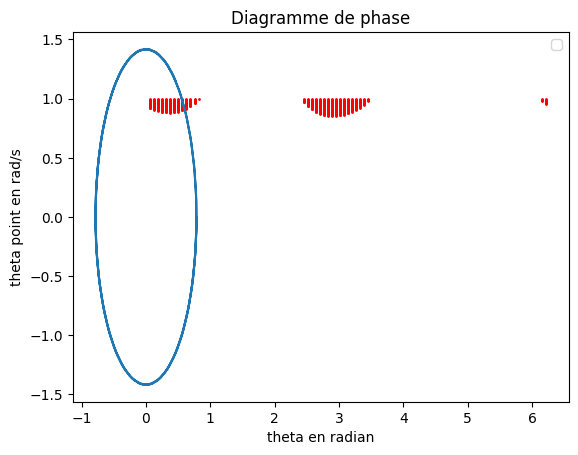

In [35]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

def angle(angle_initial,vitesse_lacher,longueur_pendule,intensite_pesanteur,t) :
  #Attention: angle_initial est ici l'angle auquel on lâche le pendule, pas l'angle où la boule est projetée.
  omega=np.sqrt(intensite_pesanteur/L)
  C_1=angle_initial#Première constante de la solution de l'ED
  C_2=vitesse_lacher/(longueur_pendule*omega)# 0 dans l'idée. (il serait de toute façon difficile d'imprimer une vitesse exacte au pendule.)
  return C_1*np.cos(omega*t)+C_2*np.sin(omega*t)

def derivee_angle(angle_initial,vitesse_lacher,longueur_pendule,intensite_pesanteur,t):
  #Attention: angle_initial est ici l'angle auquel on lâche le pendule, pas l'angle où la boule est projetée.
  omega=np.sqrt(intensite_pesanteur/L)
  C_1=angle_initial#Première constante de la solution de l'ED
  C_2=vitesse_lacher/(longueur_pendule*omega)# 0 dans l'idée. (il serait de toute façon difficile d'imprimer une vitesse exacte au pendule.)
  return omega*(C_2*np.cos(omega*t)-C_1*np.sin(omega*t))



#Plus tard: dérivée symbolique avec sympy et/ou résolution d'une équa diff non linéaire (hors approximation des petits angles + frottements)
#avec odeint ?

#Coefficients de l'équation du second degré exprimant l'ordonnée de la boule en fonction de son abcisse. (y=Ax²+Bx+c)
def A(intensite_pesanteur,vitesse_initiale,angle_lancer):
  #Vitesse initiale est la vitesse de la boule au moment où on la lâche
  #De même, angle_lancer est l'angle formé par la direction de la boule (portée par u_theta dans le paramétrage usuel du pendule)
  #avec le sol supposé parfaitement plat et horizontal au moment où elle est propulsée dans les airs.
  #intensite_pesanteur = g dans notre cas.
  return -0.5*intensite_pesanteur/(0.001+vitesse_initiale**2*np.cos(angle_lancer)**2)

def B(intensite_pesanteur,vitesse_initiale,angle_lancer,longueur_pendule):
  return np.tan(angle_lancer)*(1+intensite_pesanteur*longueur_pendule/(0.001+vitesse_initiale**2*np.cos(angle_lancer)))

def C(intensite_pesanteur,vitesse_initiale,angle_lancer,hauteur_initiale):
  #hauteur_initiale est la hauteur à laquelle on libère la boule.
  a=angle_lancer
  i=intensite_pesanteur
  expr=i/2*(L*np.tan(a)/vitesse_initiale)**2

  return hauteur_initiale-(L*np.cos(a)+L*np.tan(a)*np.sin(a)+expr)

def delta(intensite_pesanteur,vitesse_initiale,angle_lancer,longueur_pendule,hauteur_initiale):
  a=A(intensite_pesanteur,vitesse_initiale,angle_lancer)
  b=B(intensite_pesanteur,vitesse_initiale,angle_lancer,longueur_pendule)
  c=C(intensite_pesanteur,vitesse_initiale,angle_lancer,hauteur_initiale)
  return b**2-4*a*c

def relation_implicite(intensite_pesanteur,vitesse_initiale,angle_lancer,longueur_pendule,hauteur_initiale,portee_voulue):
  a=A(intensite_pesanteur,vitesse_initiale,angle_lancer)
  b=B(intensite_pesanteur,vitesse_initiale,angle_lancer,longueur_pendule)
  return (2*a*portee_voulue+b)**2-delta(intensite_pesanteur,vitesse_initiale,angle_lancer,longueur_pendule,hauteur_initiale)

def trace_couples_possibles(intensite_pesanteur,vitesse_initiale,angle_lancer,longueur_pendule,hauteur_initiale,portee_voulue,seuil):
  return abs(relation_implicite(intensite_pesanteur,vitesse_initiale,angle_lancer,longueur_pendule,hauteur_initiale,portee_voulue))<=seuil


def traceur(intensite_pesanteur,longueur_pendule,hauteur_initiale,portee_voulue,seuil):
  LARGEUR_GRILLE=100
  HAUTEUR_GRILLE=200
  for theta in range(1,LARGEUR_GRILLE):
    theta_rescale=2*np.pi*theta/LARGEUR_GRILLE #Dans ]0;2*pi]

    for theta_point in range(1,HAUTEUR_GRILLE):
      theta_point_rescale=theta_point/HAUTEUR_GRILLE

      v0=longueur_pendule*theta_point_rescale#Cf. expression de la vitesse en polaires

      if trace_couples_possibles(intensite_pesanteur,v0,theta_rescale,longueur_pendule,hauteur_initiale,portee_voulue,seuil):
        plt.plot(theta_rescale,theta_point_rescale,'ro',markersize=1)

  return 0

g=9.81
L=3 #en mètres
h=L+0.5 #Hauteur initiale
portee=6 # Portée voulue en m

nb_sec=10#Tracé du portrait de phase pour t entre 0 et 10 secondes
dt=1/10#Quantification du temps

#Paramètres de la fonction angle: angle_initial,vitesse_lacher,longueur_pendule,intensite_pesanteur,t

theta_0=np.pi/4#45 degrés, en dehors de la limite de validité de l'adpa mais peut-être intéressant en résolvant l'équa diff non linéaire

nb_points=round(nb_sec/dt)
theta_diag_phase = [angle(theta_0,0,L,g,t*dt) for t in range (nb_points)]
theta_point_diag_phase = [derivee_angle(theta_0,0,L,g,t*dt) for t in range (nb_points)]

traceur(g,L,h,portee,55)



"""
  A FAIRE:
  I) Vérifier les équations (aspect physique, aspect mathématique/calculatoire, aspect implémentation)
  II) Trouver un meilleur seuil, justifiable mathématiquement et qui prend en compte les arrondis de calcul/erreurs liées aux flottants
  (éventuellement avec estimation de l'erreur par Taylor-Lagrange par exemple, ou autre méthode d'analyse numérique+ Continuité des fonctions mises en jeu ?)


  III)Borner plus généralement l'erreur possible (éviter d'avoir des surprises au moment de la réalisation physique).
  IV)Ecrire d'autres fonctions angle et derivee_angle
    1) angle_NL1,derivee_angle_NL1 qui résolvent l'équa diff non linéaire du pendule simple sans l'approximation harmonique; (odeint)
    2) angle_NL2,derivee_angle_NL2 (prise en compte des frottements de l'air)
    3) angle_NL3,derivee_angle_NL3 (Tout ce qui précède + pendule pesant)
    4) angle_NL4,derivee_angle_NL4 (Tout ce qui précède + liaison pivot IMPARFAITE (nouvelle source de frottements))

    A chaque fois, vérifier les points suivants:
    * pertinence physique
    *(preuve de) correction des calculs sur le plan mathématique,
    * prise en compte des erreurs de calculs de la machine; "incertitudes" de calcul à borner.
    * vérification de l'implémentation.

  -> (Eventuellement/a terme): utiliser une bibliothèque de précision arithmétique arbitraire pour les calculs.
"""

plt.plot(theta_diag_phase,theta_point_diag_phase)
plt.title("Diagramme de phase")
plt.xlabel("theta en radian")
plt.ylabel("theta point en rad/s")
plt.legend()
plt.show()

